<a href="https://colab.research.google.com/github/mfaatihyusron/IBM_Student_Depression_Dataset_Analysis/blob/main/DS_Muhammad_Faatih_Yusron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

# Memuat dataset
from google.colab import files
uploaded = files.upload()  # Pilih file yang ingin diunggah

# Membaca dataset
data = pd.read_csv("Student Depression Dataset.csv")
print(data.head())


Saving Student Depression Dataset.csv to Student Depression Dataset.csv
   id  Gender  Age           City Profession  Academic Pressure  \
0   2    Male   33  Visakhapatnam    Student                  5   
1   8  Female   24      Bangalore    Student                  2   
2  26    Male   31       Srinagar    Student                  3   
3  30  Female   28       Varanasi    Student                  3   
4  32  Female   25         Jaipur    Student                  4   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0              0  8.97                   2                 0   
1              0  5.90                   5                 0   
2              0  7.03                   5                 0   
3              0  5.59                   2                 0   
4              0  8.13                   3                 0   

      Sleep Duration Dietary Habits   Degree  \
0          5-6 hours        Healthy  B.Pharm   
1          5-6 hours       Moderate      BSc

## Pre Processing

In [ ]:
# Total data kosong per kolom
total_missing_per_column = data.isnull().sum()
print("\nTotal data kosong per kolom:", total_missing_per_column)

# Total keseluruhan data kosong
total_missing_overall = data.isnull().sum().sum()
print("\nTotal keseluruhan data kosong:", total_missing_overall)

# Cek data duplikat
duplicate_rows = data[data.duplicated()]
print("\nJumlah data duplikat:", len(duplicate_rows))
print("\nData duplikat:\n", duplicate_rows)

#cek jumlah data dan kolom
num_rows, num_cols = data.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_cols}")



Total data kosong per kolom: id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64

Total keseluruhan data kosong: 0

Jumlah data duplikat: 0

Data duplikat:
 Empty DataFrame
Columns: [id, Gender, Age, City, Profession, Academic Pressure, Work Pressure, CGPA, Study 

In [ ]:
#Menghapus Kolom yang Tidak Dibutuhkan

# Menghapus kolom 'id' karena dianggap tidak relevan untuk analisis
data = data.drop(columns=['id'])

# Menghapus data Age yang lebih dari 40
data = data[data['Age'] <= 40]

# Memperbaiki nilai tidak valid pada kolom Age
data['Age'] = data['Age'].apply(lambda x: x if x > 0 else data['Age'].median())


# Langkah 5: Meringkas Dataset yang Sudah Dibersihkan

# Menampilkan statistik ringkasan dari dataset yang sudah dibersihkan
cleaned_summary_stats = data.describe(include='all')
missing_values_after_cleaning = data.isnull().sum()

print(cleaned_summary_stats)
print("Nilai kosong setelah pembersihan:\n", missing_values_after_cleaning)

# Langkah 6: Menyimpan Dataset yang Sudah Dibersihkan

# Menyimpan dataset ke file CSV baru
data.to_csv('Student_Depression_Dataset_Cleaned.csv', index=False)



       Gender           Age    City Profession  Academic Pressure  \
count   27879  27879.000000   27879      27879       27879.000000   
unique      2           NaN      52         14                NaN   
top      Male           NaN  Kalyan    Student                NaN   
freq    15538           NaN    1570      27848                NaN   
mean      NaN     25.807418     NaN        NaN           3.141325   
std       NaN      4.872457     NaN        NaN           1.381381   
min       NaN     18.000000     NaN        NaN           0.000000   
25%       NaN     21.000000     NaN        NaN           2.000000   
50%       NaN     25.000000     NaN        NaN           3.000000   
75%       NaN     30.000000     NaN        NaN           4.000000   
max       NaN     39.000000     NaN        NaN           5.000000   

        Work Pressure          CGPA  Study Satisfaction  Job Satisfaction  \
count    27879.000000  27879.000000        27879.000000      27879.000000   
unique           

<ipython-input-5-c457336f6e80>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].apply(lambda x: x if x > 0 else data['Age'].median())


In [ ]:

# Mengunduh file yang sudah dibersihkan(opsional)
# from google.colab import files
# files.download('Student_Depression_Dataset_Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## EDA

<Figure size 1200x600 with 0 Axes>

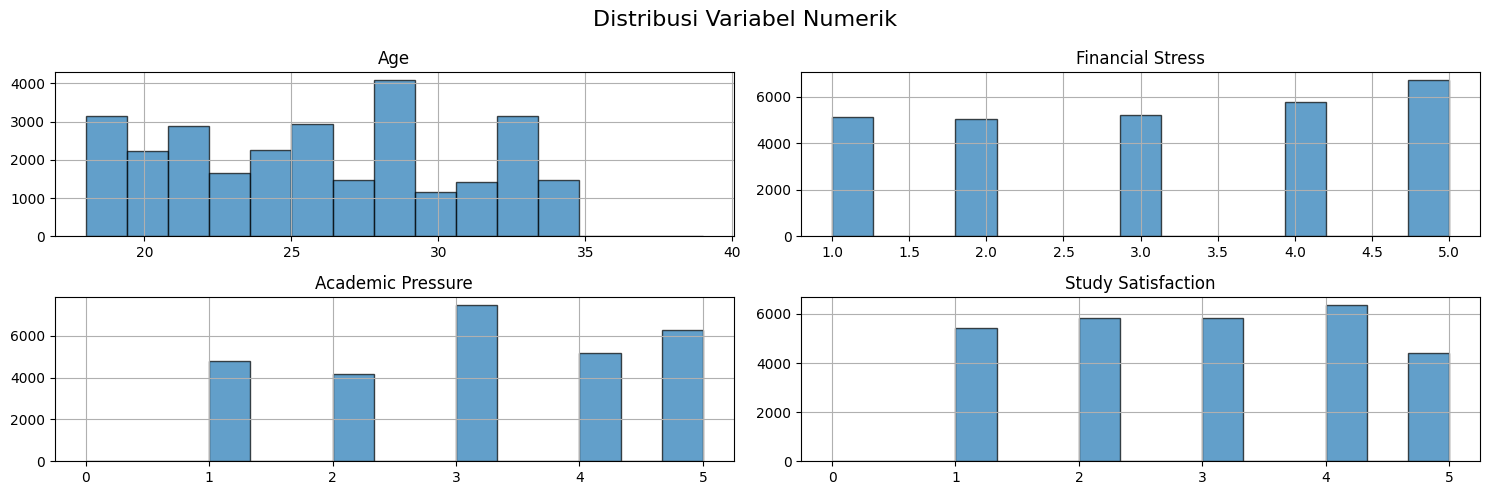

In [ ]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca dataset yang sudah dibersihkan
data = pd.read_csv('/content/Student_Depression_Dataset_Cleaned.csv')

# ======================================================
# VISUALISASI EDA
# ======================================================

# Visualisasi distribusi variabel numerik
plt.figure(figsize=(12, 6))
data[['Age', 'Financial Stress', 'Academic Pressure','Study Satisfaction']].hist(bins=15, edgecolor='black', alpha=0.7, figsize=(15, 5))
plt.suptitle("Distribusi Variabel Numerik", fontsize=16)
plt.tight_layout()
plt.show()



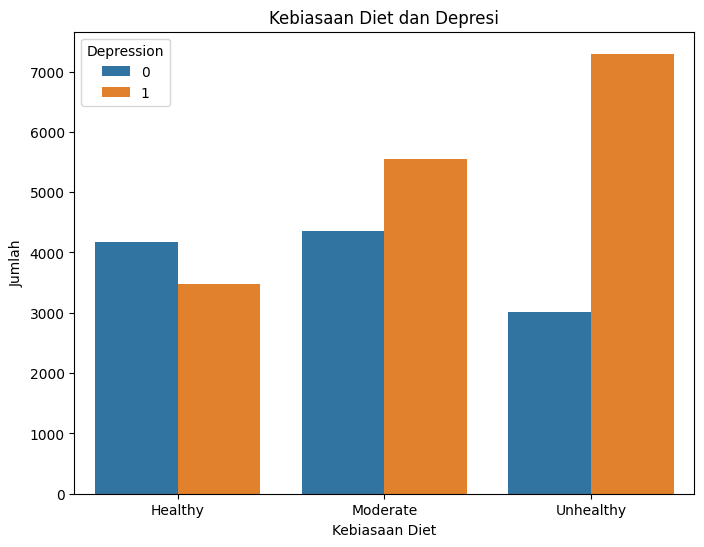

<ipython-input-8-3a29b9de2209>:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'])


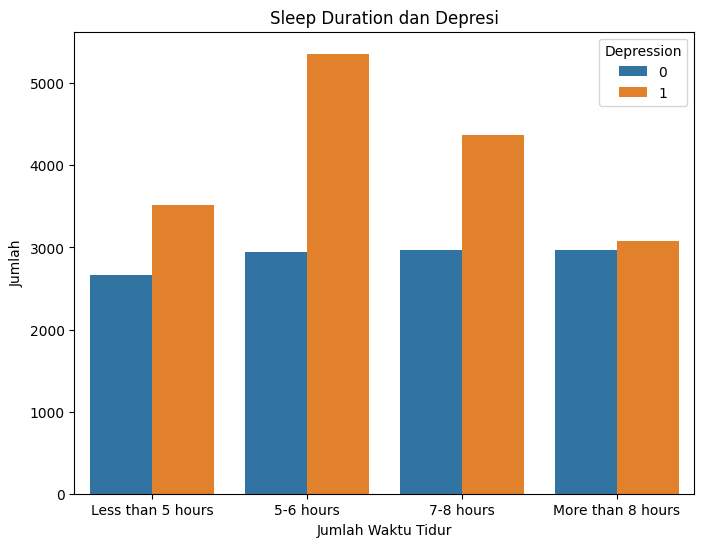

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Dietary Habits dan Depresi
# Filter data untuk menghapus 'Others' pada Dietary Habits
filtered_data_diet = data[data['Dietary Habits'] != 'Others']
plt.figure(figsize=(8, 6))
sns.countplot(x='Dietary Habits', hue='Depression', data=filtered_data_diet)
plt.title('Kebiasaan Diet dan Depresi')
plt.xlabel('Kebiasaan Diet')
plt.ylabel('Jumlah')
plt.show()

# Sleep Duration dan Depression
# Filter data untuk menghapus 'Others' pada Sleep Duration
filtered_data_sleep = data[data['Sleep Duration'] != 'Others']
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Sleep Duration', hue='Depression', data=filtered_data_sleep)
plt.title('Sleep Duration dan Depresi')
plt.xlabel('Jumlah Waktu Tidur')
plt.ylabel('Jumlah')

# Mengubah label sumbu x menjadi kategorikal
ax.set_xticklabels(['Less than 5 hours', '5-6 hours', '7-8 hours', 'More than 8 hours'])

plt.show()

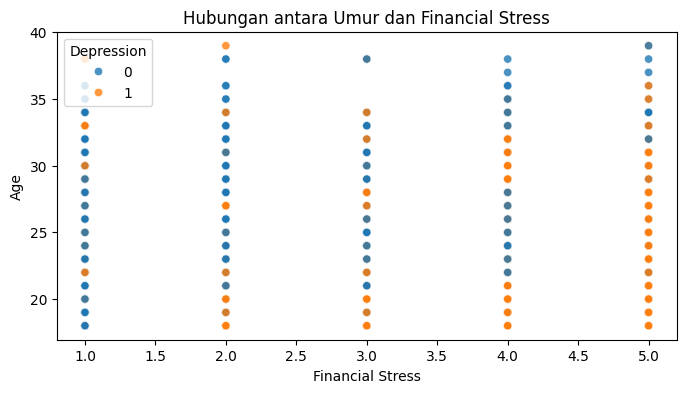

In [ ]:

# Visualisasi hubungan antara variabel numerik
plt.figure(figsize=(8, 4))
sns.scatterplot(data=data, x='Financial Stress', y='Age', hue='Depression', alpha=0.8)
plt.title("Hubungan antara Umur dan Financial Stress")
plt.xlabel("Financial Stress")
plt.ylabel("Age")
plt.legend(title="Depression")
plt.show()



<ipython-input-10-c78defc5dc69>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Gender', palette='viridis')
<ipython-input-10-c78defc5dc69>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data_diet, x='Dietary Habits', palette='coolwarm')
<ipython-input-10-c78defc5dc69>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_data_sleep, x='Sleep Duration', palette='coolwarm')


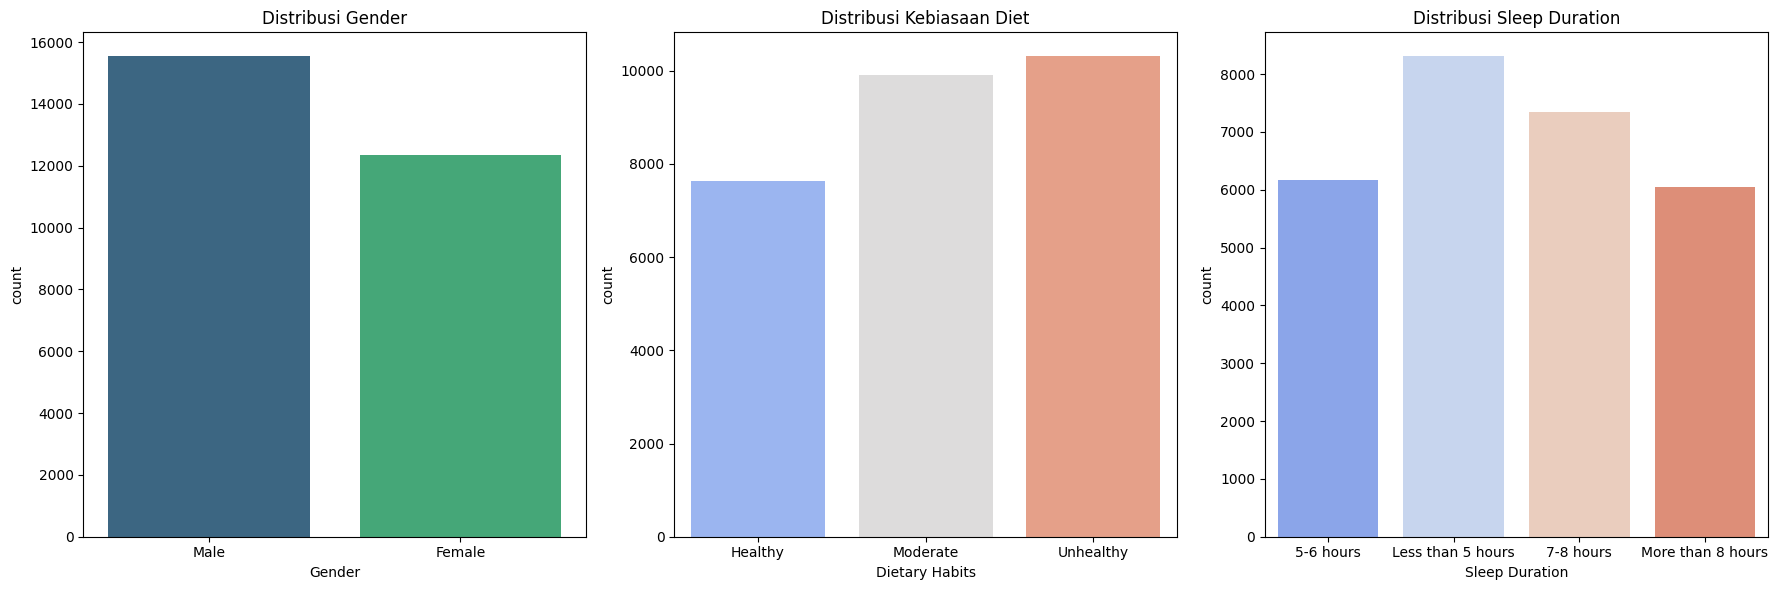

In [ ]:
# Count plot untuk data kategorikal (Gender dan Dietary Habits)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.countplot(data=data, x='Gender', palette='viridis')
plt.title("Distribusi Gender")

plt.subplot(1, 3, 2)
# Filter data untuk menghapus 'Others' pada Dietary Habits
filtered_data_diet = data[data['Dietary Habits'] != 'Others']
sns.countplot(data=filtered_data_diet, x='Dietary Habits', palette='coolwarm')
plt.title("Distribusi Kebiasaan Diet")

plt.subplot(1, 3, 3)
# Filter data untuk menghapus 'Others' pada Sleep Duration
filtered_data_sleep = data[data['Sleep Duration'] != 'Others']
sns.countplot(data=filtered_data_sleep, x='Sleep Duration', palette='coolwarm')
plt.title("Distribusi Sleep Duration")

plt.tight_layout()
plt.show()

## Processing

In [ ]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # Import StandardScaler

# Membaca dataset yang sudah dibersihkan
data = pd.read_csv('/content/Student_Depression_Dataset_Cleaned.csv')

# Pisahkan fitur (X) dan target (y)
X = data.drop('Depression', axis=1)
y = data['Depression']

# One-hot encoding untuk fitur kategorikal (misalnya Gender, Dietary Habits)
X_encoded = pd.get_dummies(X, drop_first=True)

# Langkah 3: Pemeriksaan untuk nilai tak terhingga

print("\nMemeriksa nilai tak terhingga:")
print(np.isinf(X_encoded).sum())  # Menghitung nilai tak terhingga (infinite values)

# Melakukan Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

# Membagi data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Memeriksa nilai tak terhingga:
Age                                          0
Academic Pressure                            0
Work Pressure                                0
CGPA                                         0
Study Satisfaction                           0
                                            ..
Degree_MSc                                   0
Degree_Others                                0
Degree_PhD                                   0
Have you ever had suicidal thoughts ?_Yes    0
Family History of Mental Illness_Yes         0
Length: 109, dtype: int64


##Decision Tree

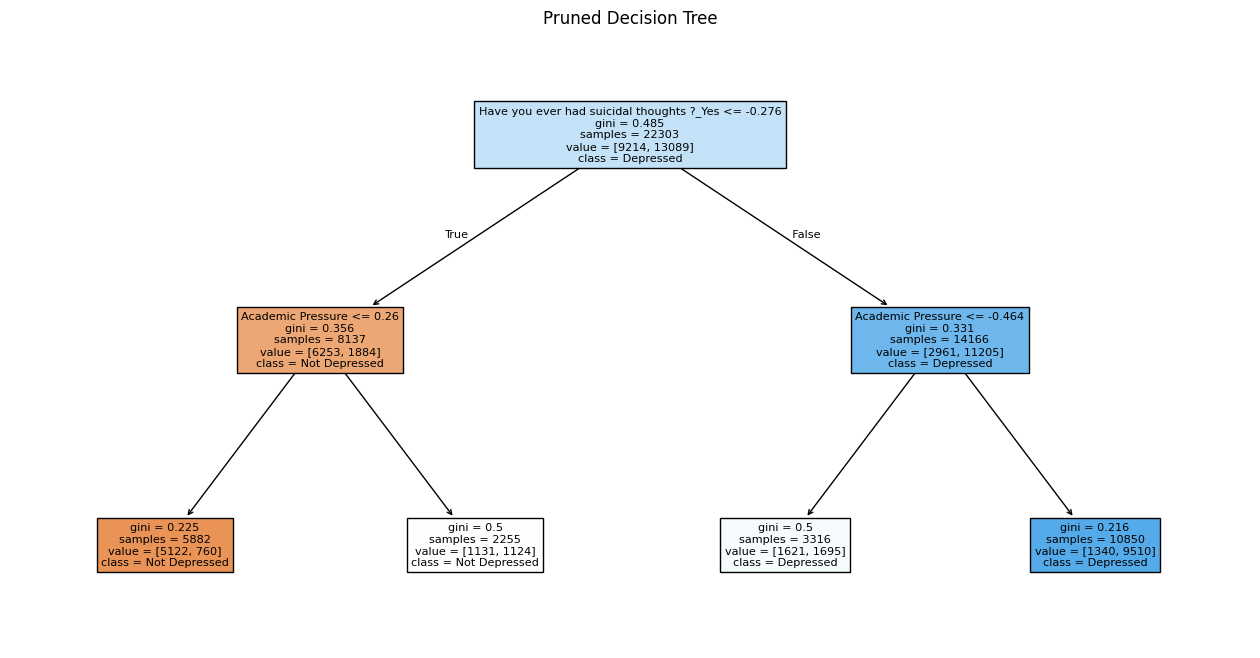

In [ ]:
# Import libraries yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Inisialisasi Decision Tree Classifier dengan parameter pruning
decision_tree = DecisionTreeClassifier(
    max_depth=2,            # Kedalaman pohon yang dipangkas
    min_samples_split=10,   # Minimum sampel untuk membagi
    min_samples_leaf=5,     # Minimum sampel per daun
    random_state=42
)

# Latih model Decision Tree
decision_tree.fit(X_train, y_train)

# Visualisasikan Decision Tree
plt.figure(figsize=(16, 8))
# Get feature names from X_encoded (before scaling)
feature_names = X_encoded.columns
plot_tree(decision_tree, feature_names=feature_names,
          class_names=['Not Depressed', 'Depressed'], filled=True)
plt.title("Pruned Decision Tree")
plt.show()

## Random Forest

In [ ]:
# Import libraries yang dibutuhkan
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import pandas as pd

# Inisialisasi Random Forest Classifier
random_forest = RandomForestClassifier(
    random_state=42,  # Untuk reproduktifitas
    n_estimators=100  # Jumlah pohon dalam hutan
)

# Latih Random Forest pada data pelatihan
random_forest.fit(X_train, y_train)

# Lakukan Cross-Validation dengan 5-fold
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print("\nCross-Validation Scores (Random Forest):", cv_scores)
print("Mean CV Accuracy (Random Forest): {:.4f}".format(cv_scores.mean()))

# Analisis Feature Importance
rf_feature_importances = pd.DataFrame({
    'Feature': X_encoded.columns,  # Use X_encoded.columns instead of X_train.columns
    'Importance': random_forest.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances (Random Forest):")
print(rf_feature_importances)



Cross-Validation Scores (Random Forest): [0.83591123 0.83680789 0.8399462  0.84775785 0.85358744]
Mean CV Accuracy (Random Forest): 0.8428

Feature Importances (Random Forest):
                                       Feature  Importance
107  Have you ever had suicidal thoughts ?_Yes    0.191466
1                            Academic Pressure    0.146412
7                             Financial Stress    0.092386
0                                          Age    0.073434
3                                         CGPA    0.068647
..                                         ...         ...
67                           Profession_Lawyer    0.000000
18                                 City_Gaurav    0.000000
34                                  City_M.Com    0.000000
20                                  City_Harsh    0.000000
31                     City_Less than 5 Kalyan    0.000000

[109 rows x 2 columns]


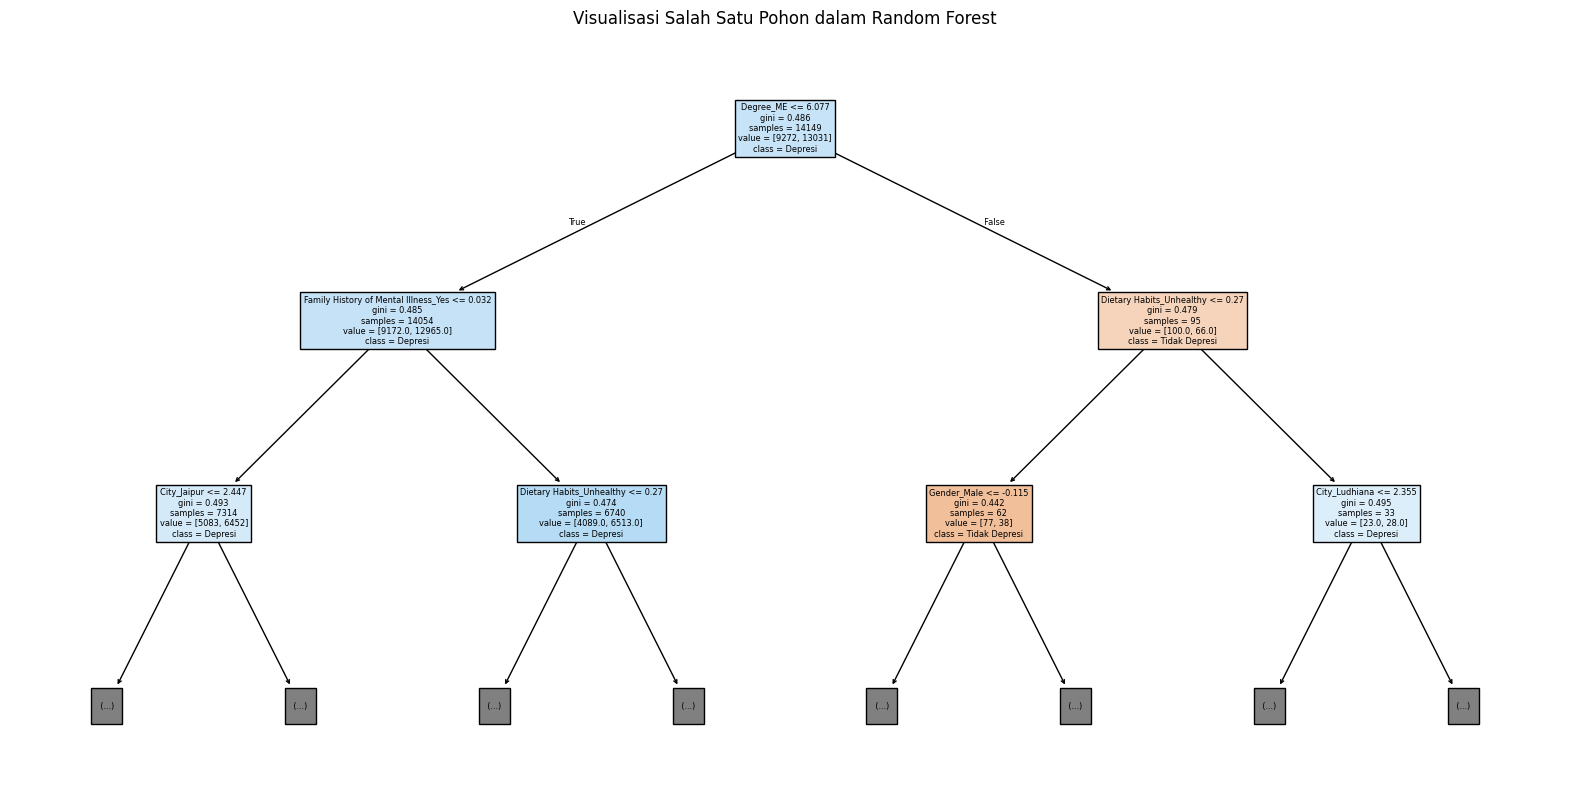

In [ ]:
# Visualisasikan pohon pertama dalam Random Forest
plt.figure(figsize=(20, 10))
plot_tree(
    random_forest.estimators_[0],  # Mengambil pohon pertama dari Random Forest
    feature_names=X_encoded.columns,  # Use X_encoded.columns instead of X_train.columns
    class_names=['Tidak Depresi', 'Depresi'],  # Nama kelas
    filled=True,  # Mengisi warna berdasarkan kelas dominan
    max_depth=2  # Batasi kedalaman pohon untuk kejelasan
)
plt.title("Visualisasi Salah Satu Pohon dalam Random Forest")
plt.show()

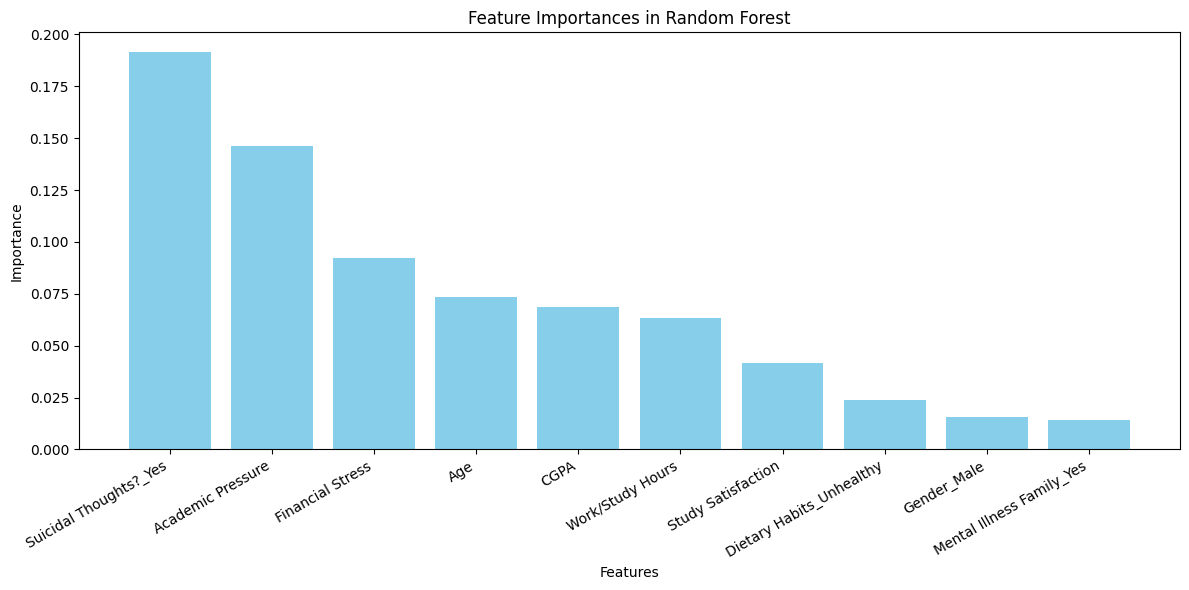

In [ ]:
# Buat dictionary untuk mengganti nama panjang ke nama pendek
rename_dict = {
    'Have you ever had suicidal thoughts ?_Yes': 'Suicidal Thoughts?_Yes',
    'Family History of Mental Illness_Yes': 'Mental Illness Family_Yes'
}

# Ganti nama fitur dalam dataframe rf_feature_importances
rf_feature_importances['Feature'] = rf_feature_importances['Feature'].replace(rename_dict)

# Visualisasi ulang dengan nama fitur pendek
top_features = rf_feature_importances.head(10)  # Ambil 10 fitur terpenting

plt.figure(figsize=(12, 6))
plt.bar(
    top_features['Feature'],  # Nama fitur setelah diubah
    top_features['Importance'],  # Nilai pentingnya
    color='skyblue'
)
plt.title("Feature Importances in Random Forest")  # Judul plot
plt.xlabel("Features")  # Label sumbu x
plt.ylabel("Importance")  # Label sumbu y
plt.xticks(rotation=30, ha='right')  # Memiringkan label fitur agar lebih mudah dibaca
plt.tight_layout()  # Menyesuaikan tata letak
plt.show()


##Evaluation Section

In [ ]:
# ======================================================
# EVALUATION SECTION
# ======================================================

# Import library evaluasi
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV


In [ ]:
# Evaluate the Decision Tree
y_pred_tree = decision_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)

print("\nDecision Tree Accuracy on Test Data: {:.4f}".format(accuracy_tree))  # Akurasi Decision Tree
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, y_pred_tree))  # Laporan klasifikasi Decision Tree



Decision Tree Accuracy on Test Data: 0.7812

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.77      0.69      0.72      2336
           1       0.79      0.85      0.82      3240

    accuracy                           0.78      5576
   macro avg       0.78      0.77      0.77      5576
weighted avg       0.78      0.78      0.78      5576



In [ ]:
# Evaluate the Random Forest
y_pred_rf = random_forest.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Accuracy on Test Data: {:.4f}".format(accuracy_rf))  # Akurasi Random Forest
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))  # Laporan klasifikasi Random Forest



Random Forest Accuracy on Test Data: 0.8424

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.82      0.79      0.81      2336
           1       0.85      0.88      0.87      3240

    accuracy                           0.84      5576
   macro avg       0.84      0.84      0.84      5576
weighted avg       0.84      0.84      0.84      5576



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Define parameter grid
param_dist = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(random_state=42)

# Perform Randomized Search with 20 iterations
random_search = RandomizedSearchCV(
    estimator=random_forest,
    param_distributions=param_dist,
    n_iter=20,            # Tentukan jumlah iterasi
    cv=5,                 # 5-fold cross-validation
    scoring='accuracy',   # Gunakan accuracy sebagai metric evaluasi
    random_state=42,
    n_jobs=-1             # Gunakan semua CPU untuk mempercepat proses
)

# Train the RandomizedSearchCV model
random_search.fit(X_train, y_train)

# Print Best Parameters and Best CV Accuracy
print("\nBest Parameters from Randomized Search (Random Forest):")
print(random_search.best_params_)
print("Best CV Accuracy from Randomized Search (Random Forest): {:.4f}".format(random_search.best_score_))

# Evaluate the Best Model on Test Data
y_pred_rf = random_search.best_estimator_.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("\nRandom Forest Accuracy on Test Data: {:.4f}".format(accuracy_rf))
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,



Best Parameters from Randomized Search (Random Forest):
{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': False}
Best CV Accuracy from Randomized Search (Random Forest): 0.8453

Random Forest Accuracy on Test Data: 0.8436

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2336
           1       0.85      0.89      0.87      3240

    accuracy                           0.84      5576
   macro avg       0.84      0.84      0.84      5576
weighted avg       0.84      0.84      0.84      5576



In [ ]:
# Prediksi dengan Decision Tree
y_pred_dt = decision_tree.predict(X_test)

# Prediksi dengan Random Forest (Use the best estimator from RandomizedSearchCV)
y_pred_rf = random_search.best_estimator_.predict(X_test)

# Evaluasi Decision Tree
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Akurasi Decision Tree: {accuracy_dt}")
print(classification_report(y_test, y_pred_dt))

# Evaluasi Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Akurasi Random Forest: {accuracy_rf}")
print(classification_report(y_test, y_pred_rf))

Akurasi Decision Tree: 0.7812051649928264
              precision    recall  f1-score   support

           0       0.77      0.69      0.72      2336
           1       0.79      0.85      0.82      3240

    accuracy                           0.78      5576
   macro avg       0.78      0.77      0.77      5576
weighted avg       0.78      0.78      0.78      5576

Akurasi Random Forest: 0.8436154949784792
              precision    recall  f1-score   support

           0       0.83      0.78      0.81      2336
           1       0.85      0.89      0.87      3240

    accuracy                           0.84      5576
   macro avg       0.84      0.84      0.84      5576
weighted avg       0.84      0.84      0.84      5576



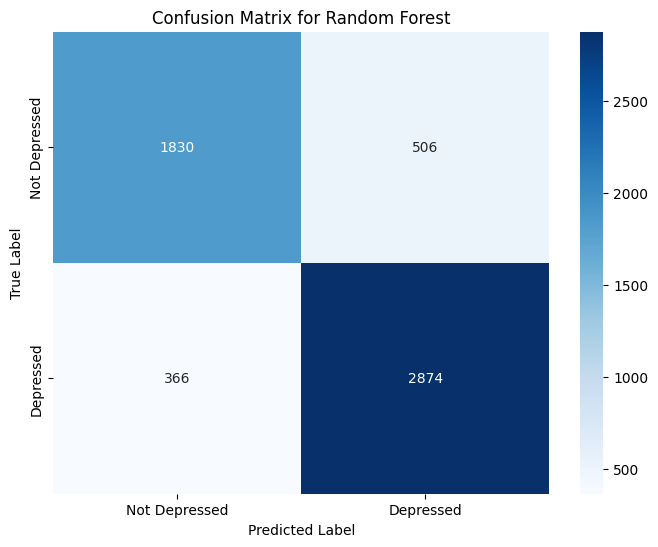

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred_rf are already defined from previous code
# y_test: true labels
# y_pred_rf: predicted labels from the Random Forest model

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Confusion Matrix for Random Forest")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

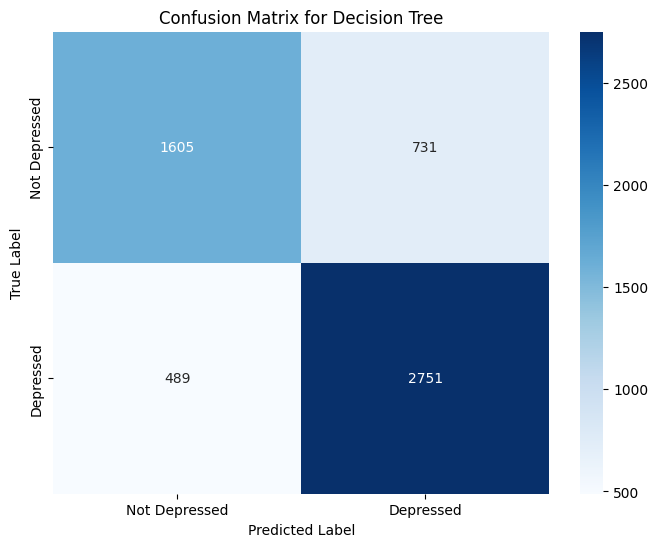

In [ ]:


# Create the confusion matrix for Decision Tree
cm_dt = confusion_matrix(y_test, y_pred_dt)

# Plot the confusion matrix using seaborn for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title("Confusion Matrix for Decision Tree")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [ ]:
data.head()

,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33,Visakhapatnam,Student,5,0,8.97,2,0,5-6 hours,Healthy,B.Pharm,Yes,3,1,No,1
1,Female,24,Bangalore,Student,2,0,5.90,5,0,5-6 hours,Moderate,BSc,No,3,2,Yes,0
2,Male,31,Srinagar,Student,3,0,7.03,5,0,Less than 5 hours,Healthy,BA,No,9,1,Yes,0
3,Female,28,Varanasi,Student,3,0,5.59,2,0,7-8 hours,Moderate,BCA,Yes,4,5,Yes,1
4,Female,25,Jaipur,Student,4,0,8.13,3,0,5-6 hours,Moderate,M.Tech,Yes,1,1,No,0
